# EDA and Visualization

## Armando Bringas
- Student ID: 2023490306
- Status: International Student
- University: Tecnológico de Monterrey
- Location: Querétaro, México

## Alexis Guerrero
- Student ID: 2023480366
- Status: International Student
- University: Universidad de Chile
- Location: Santiago de Chile, Chile

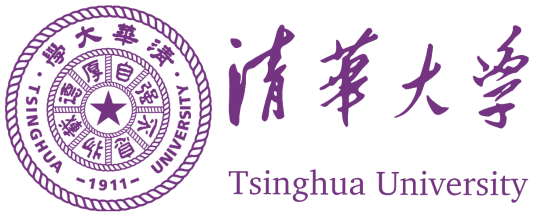

In [1]:
import gc
from IPython.display import Markdown
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings


## Exploratory Data Analysis (EDA)

In [2]:
train_series = pd.read_parquet("../data/train_series.parquet")
train_events = pd.read_csv("../data/train_events.csv")

### Train Series

In [3]:
train_series.head()

,series_id,step,timestamp,anglez,enmo
0,038441c925bb,0,2018-08-14T15:30:00-0400,2.6367,0.0217
1,038441c925bb,1,2018-08-14T15:30:05-0400,2.6368,0.0215
2,038441c925bb,2,2018-08-14T15:30:10-0400,2.6370,0.0216
3,038441c925bb,3,2018-08-14T15:30:15-0400,2.6368,0.0213
4,038441c925bb,4,2018-08-14T15:30:20-0400,2.6368,0.0215


In [4]:
train_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127946340 entries, 0 to 127946339
Data columns (total 5 columns):
 #   Column     Dtype  
---  ------     -----  
 0   series_id  object 
 1   step       uint32 
 2   timestamp  object 
 3   anglez     float32
 4   enmo       float32
dtypes: float32(2), object(2), uint32(1)
memory usage: 3.3+ GB


In [5]:
train_series.describe(include='all')

,series_id,step,timestamp,anglez,enmo
count,127946340,1.279463e+08,127946340,1.279463e+08,1.279463e+08
unique,277,NaN,12159540,NaN,NaN
top,78569a801a38,NaN,2018-12-27T10:03:30-0500,NaN,NaN
freq,1433880,NaN,19,NaN,NaN
mean,NaN,2.548048e+05,NaN,-8.810453e+00,4.131503e-02
std,NaN,1.778930e+05,NaN,3.552188e+01,1.018289e-01
min,NaN,0.000000e+00,NaN,-9.000000e+01,0.000000e+00
25%,NaN,1.158120e+05,NaN,-3.185890e+01,1.300000e-03
50%,NaN,2.345190e+05,NaN,-9.597900e+00,1.720000e-02
75%,NaN,3.571960e+05,NaN,1.130020e+01,4.370000e-02


In [6]:
# Check null values
train_series.isnull().any()

series_id    False
step         False
timestamp    False
anglez       False
enmo         False
dtype: bool

### Train Events

In [7]:
train_events.head()

,series_id,night,event,step,timestamp
0,038441c925bb,1,onset,4992.0,2018-08-14T22:26:00-0400
1,038441c925bb,1,wakeup,10932.0,2018-08-15T06:41:00-0400
2,038441c925bb,2,onset,20244.0,2018-08-15T19:37:00-0400
3,038441c925bb,2,wakeup,27492.0,2018-08-16T05:41:00-0400
4,038441c925bb,3,onset,39996.0,2018-08-16T23:03:00-0400


In [8]:
train_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14508 entries, 0 to 14507
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   series_id  14508 non-null  object 
 1   night      14508 non-null  int64  
 2   event      14508 non-null  object 
 3   step       9585 non-null   float64
 4   timestamp  9585 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 566.8+ KB


In [9]:
train_events.describe(include='all')

,series_id,night,event,step,timestamp
count,14508,14508.000000,14508,9585.000000,9585
unique,277,NaN,2,NaN,9360
top,78569a801a38,NaN,onset,NaN,2017-11-27T21:37:00-0500
freq,168,NaN,7254,NaN,3
mean,NaN,15.120072,NaN,214352.123944,NaN
std,NaN,10.286758,NaN,141268.408192,NaN
min,NaN,1.000000,NaN,936.000000,NaN
25%,NaN,7.000000,NaN,95436.000000,NaN
50%,NaN,14.000000,NaN,200604.000000,NaN
75%,NaN,21.000000,NaN,317520.000000,NaN


In [10]:
# Check null values
train_events.isnull().any()

series_id    False
night        False
event        False
step          True
timestamp     True
dtype: bool

## Pre-processing of Data

In [11]:
train_events = train_events.dropna(axis=0, ignore_index=True)
train_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9585 entries, 0 to 9584
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   series_id  9585 non-null   object 
 1   night      9585 non-null   int64  
 2   event      9585 non-null   object 
 3   step       9585 non-null   float64
 4   timestamp  9585 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 374.5+ KB


### Invalid events

Search for occurrences of "bad nights," which refers to any nights deviating from a single onset/wakeup pattern.

In [12]:
bad_nights = train_events[['series_id', 'night', 'event']].groupby(by=['series_id', 'night']).count()
bad_nights[bad_nights['event']!=2]

,,event
series_id,night,
0ce74d6d2106,20,1
154fe824ed87,30,1
44a41bba1ee7,10,1
efbfc4526d58,7,1
f8a8da8bdd00,17,1


Removing problematic Data

In [13]:
train_events = train_events[~(((train_events['series_id']=='0ce74d6d2106') & (train_events['night']==20)) |
                              ((train_events['series_id']=='154fe824ed87') & (train_events['night']==30)) |
                              ((train_events['series_id']=='44a41bba1ee7') & (train_events['night']==10)) |                
                              ((train_events['series_id']=='efbfc4526d58') & (train_events['night']==7)) |
                              ((train_events['series_id']=='f8a8da8bdd00') & (train_events['night']==17)))].reset_index(drop=True)

train_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9580 entries, 0 to 9579
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   series_id  9580 non-null   object 
 1   night      9580 non-null   int64  
 2   event      9580 non-null   object 
 3   step       9580 non-null   float64
 4   timestamp  9580 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 374.3+ KB


In [14]:
series_ID_list = list(train_events['series_id'].unique())
print('Total number of valid series in training dataset: '+ str(len(series_ID_list)))

Total number of valid series in training dataset: 269


In [15]:
# Update train_series dataset with final set of series
train_series = train_series[train_series['series_id'].isin(series_ID_list)].reset_index(drop=True)

# Check for nulls
train_series.isnull().any()

series_id    False
step         False
timestamp    False
anglez       False
enmo         False
dtype: bool

### Sample encoding and merge data 

In [16]:
train_events["step"]  = train_events["step"].astype("int")
train_events["awake"] = train_events["event"].replace({"onset":1,"wakeup":0})

train_data = pd.merge(train_series, train_events[['step','awake']], on='step', how='left')
train_data["awake"] = train_data["awake"].bfill(axis ='rows')
train_data['awake'] = train_data['awake'].fillna(1) # awake
train_data["awake"] = train_data["awake"].astype("int")


In [17]:
train_data.sample(10)

,series_id,step,timestamp,anglez,enmo,awake
122483019,fa149c3c4bde,96695,2018-09-05T09:17:55-0400,-35.084999,0.0153,0
78153839,aa81faa78747,173071,2018-03-09T17:22:35-0500,-21.054701,0.0504,0
72679565,9c91c546e095,325646,2018-06-12T08:47:10-0400,-15.501500,0.0261,0
45231413,601559e1777d,94646,2019-03-27T22:57:10-0400,5.609400,0.0000,1
14889984,188d4b7cd28b,353126,2017-11-29T02:42:10-0500,-37.105000,0.0158,0
87987116,c289c8a823e0,596500,2018-07-11T22:58:20-0400,-25.187000,0.0085,0
1435520,0402a003dae9,315686,2019-01-05T19:12:10-0500,-22.354099,0.0235,1
88812131,c38707ef76df,321529,2018-06-03T01:04:05-0400,-5.172600,0.1138,0
81075524,b7188813d58a,125675,2018-10-11T18:32:55-0400,26.743799,0.0016,1
115373893,ece2561f07e9,424534,2017-09-02T01:52:50-0400,-68.697403,0.0000,0


## Visualization

###  anglez for series 038441c925bb

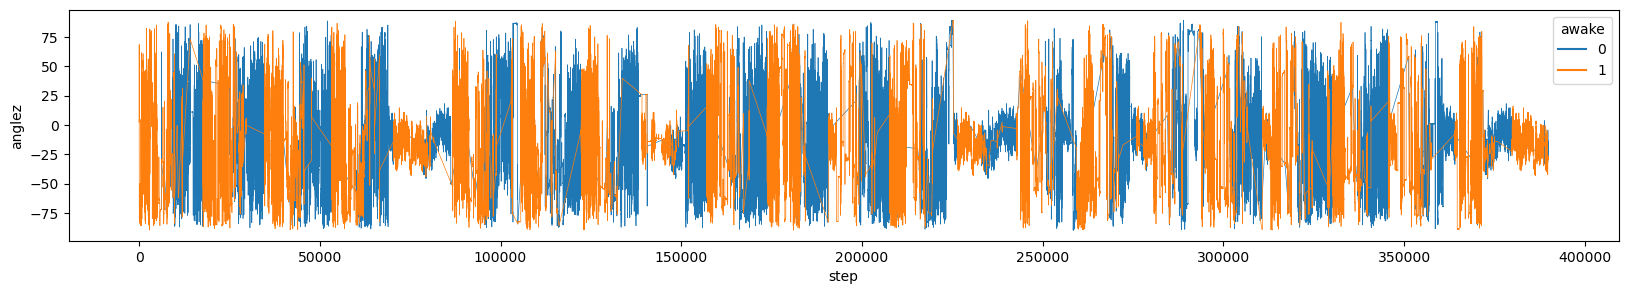

###  enmo for series 038441c925bb

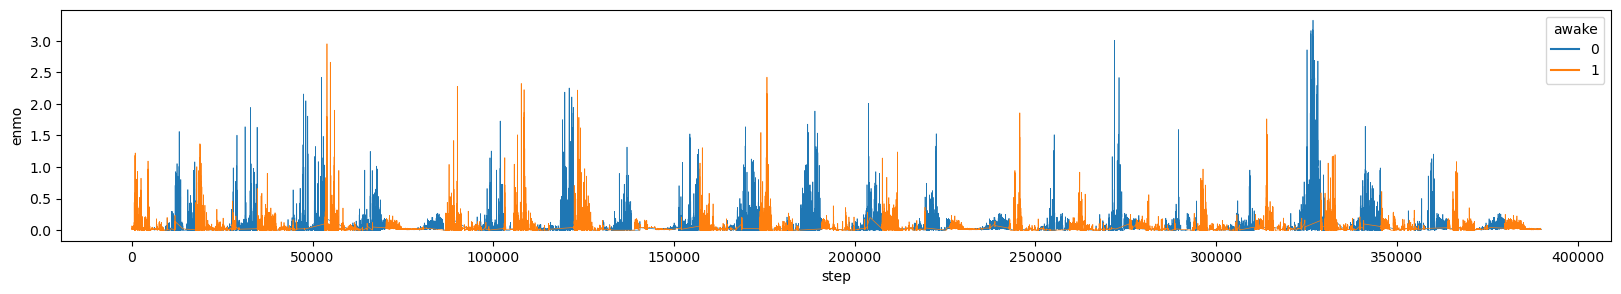

###  anglez for series 03d92c9f6f8a

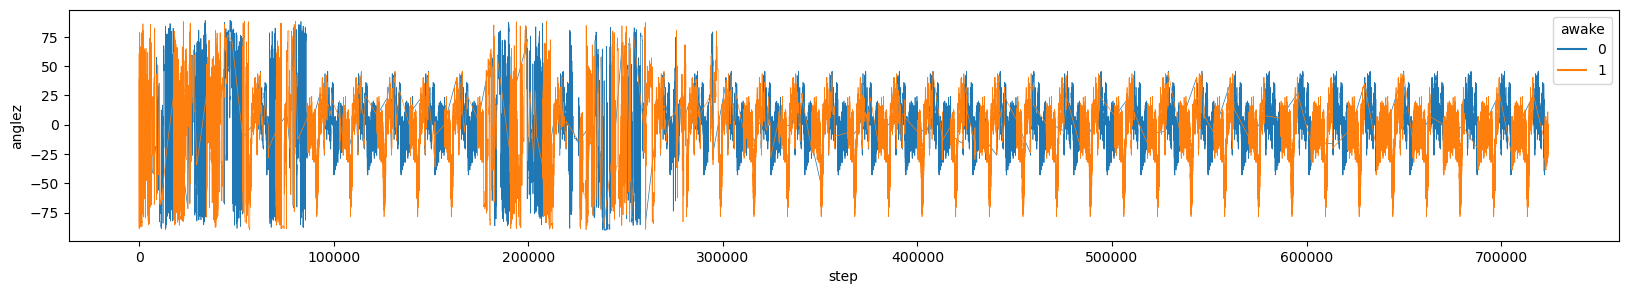

###  enmo for series 03d92c9f6f8a

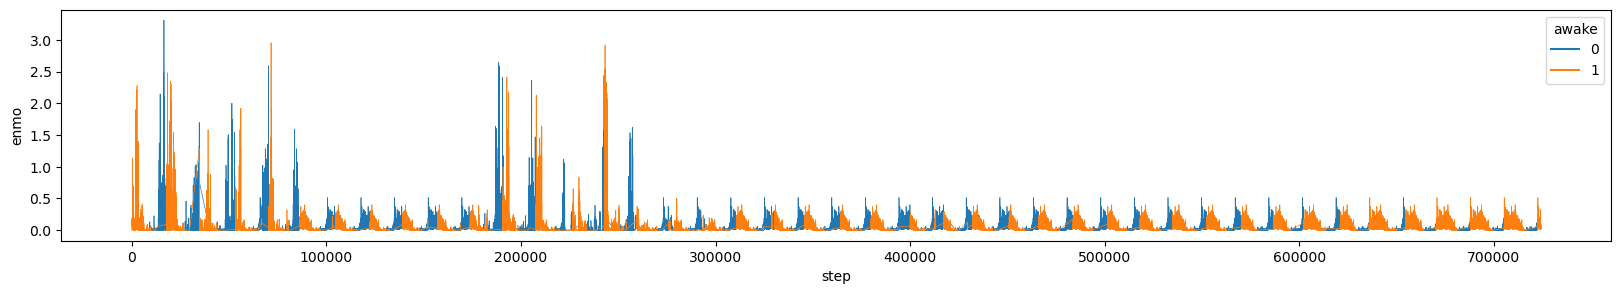

###  anglez for series 0402a003dae9

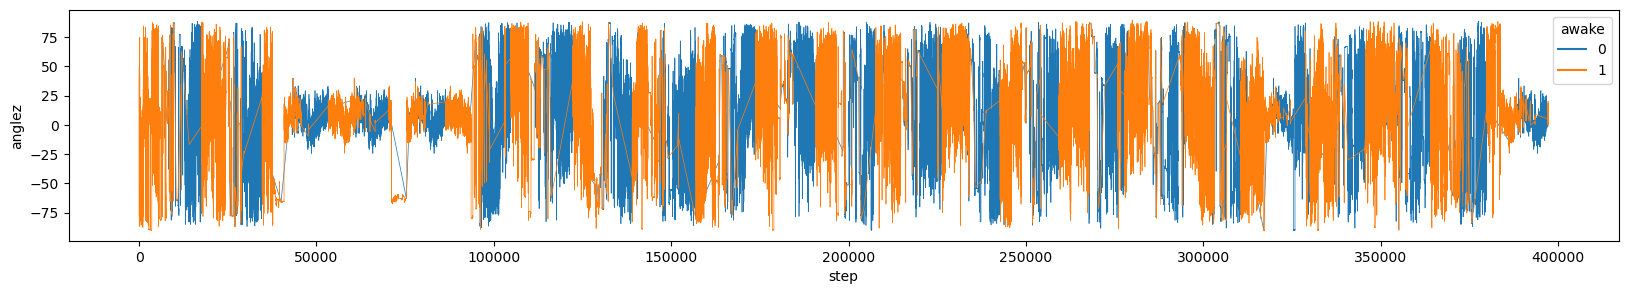

###  enmo for series 0402a003dae9

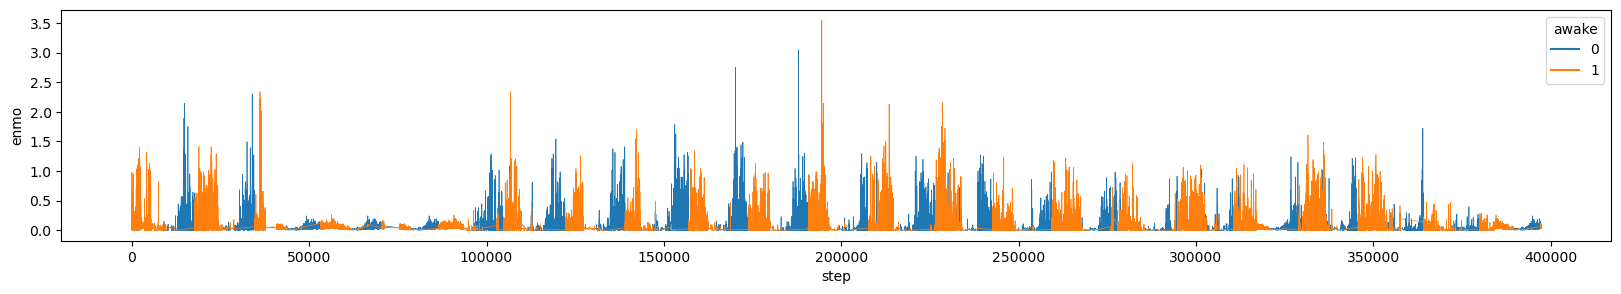

###  anglez for series 04f547b8017d

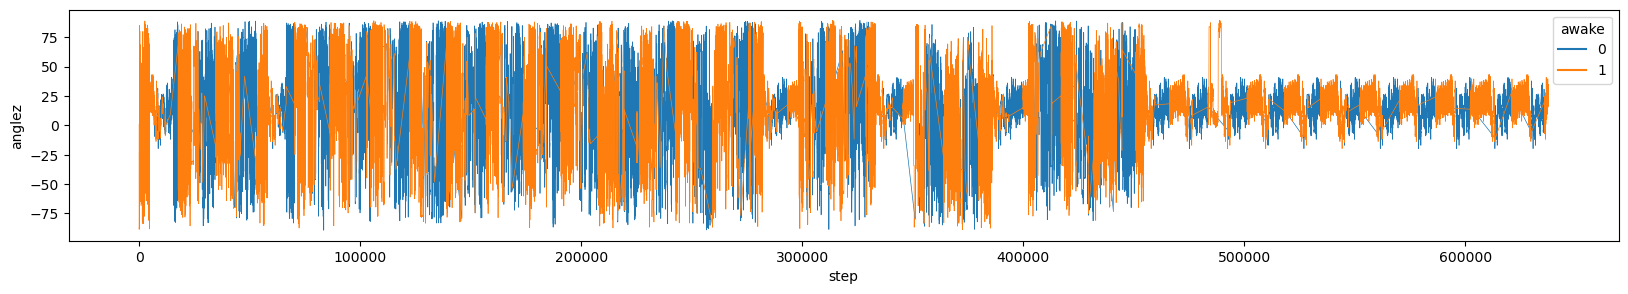

###  enmo for series 04f547b8017d

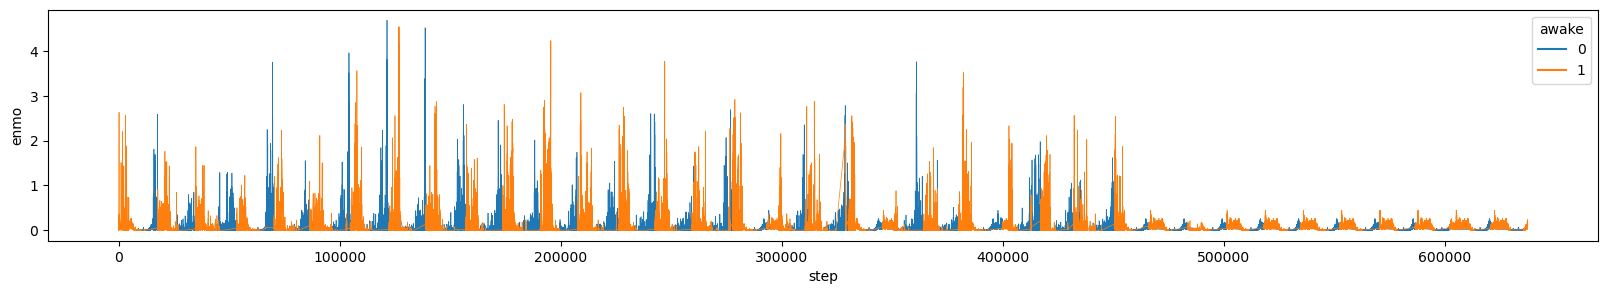

###  anglez for series 05e1944c3818

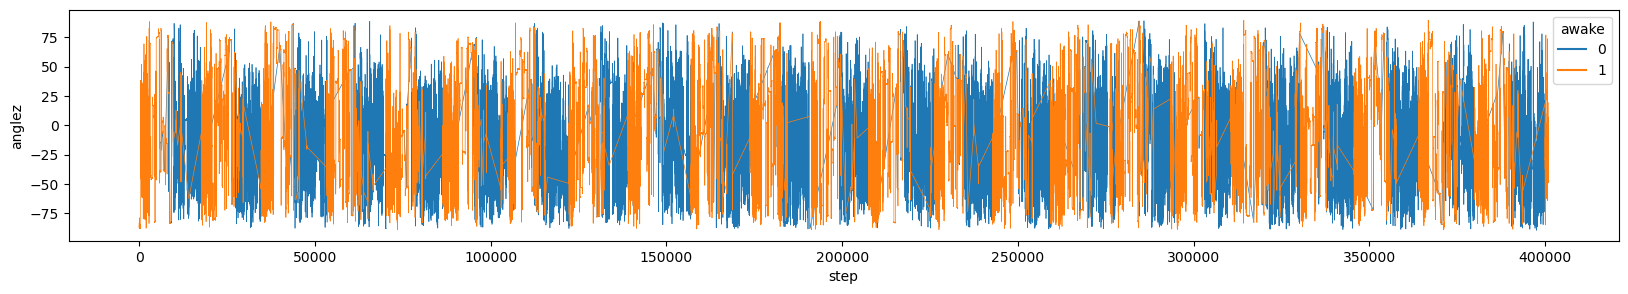

###  enmo for series 05e1944c3818

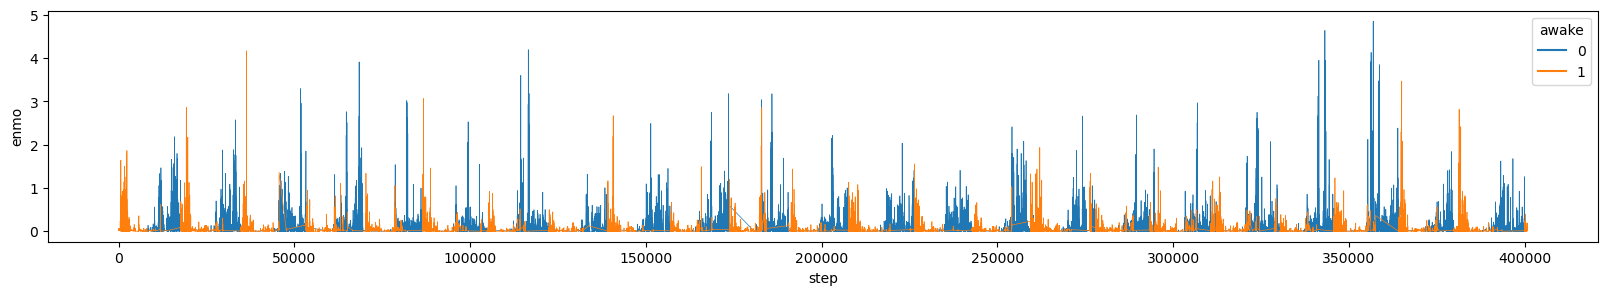

In [18]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    counter = 0  # Initialize the counter

    for series_ID in series_ID_list:
        train_series_sample = train_data[train_data['series_id'] == series_ID]

        # Plotting anglez
        display(Markdown('###  anglez for series ' + str(series_ID)))
        fig, ax = plt.subplots(figsize=(20, 3))
        sns.lineplot(data=train_series_sample, x="step", y="anglez", hue="awake", linewidth=0.5)
        plt.show()

        # Plotting enmo
        display(Markdown('###  enmo for series ' + str(series_ID)))
        fig, ax = plt.subplots(figsize=(20, 3))
        sns.lineplot(data=train_series_sample, x="step", y="enmo", hue="awake", linewidth=0.5)
        plt.show()

        # Memory cleanup
        del train_series_sample
        gc.collect()

        counter += 1  # Increment the counter after each iteration

        if counter == 5:
            break  # Break the loop when the counter equals 5